In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns


In [66]:
df= pd.read_csv("country_vaccinations.csv")

In [67]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [68]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.025100e+04,9.526000e+03,7.185000e+03,8.568000e+03,1.739100e+04,10251.000000,9526.000000,7185.000000,17391.000000
mean,5.716299e+06,3.500000e+06,1.817309e+06,1.445607e+05,7.941384e+04,17.199317,12.341277,6.403328,3031.492094
std,2.399767e+07,1.313534e+07,7.875693e+06,5.906624e+05,3.837504e+05,24.719775,16.087866,10.620806,4639.012478
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.450950e+04,5.595875e+04,2.520600e+04,3.176000e+03,8.520000e+02,1.500000,1.390000,0.700000,355.000000
50%,4.701090e+05,3.617215e+05,1.920300e+05,1.674100e+04,5.974000e+03,7.170000,5.620000,2.670000,1523.000000
75%,2.154874e+06,1.491252e+06,7.725270e+05,6.590250e+04,3.005350e+04,22.565000,17.017500,7.470000,4122.500000
max,3.669100e+08,1.546242e+08,1.189873e+08,1.263800e+07,9.882286e+06,220.400000,114.950000,105.460000,118759.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17607 entries, 0 to 17606
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              17607 non-null  object 
 1   iso_code                             17607 non-null  object 
 2   date                                 17607 non-null  object 
 3   total_vaccinations                   10251 non-null  float64
 4   people_vaccinated                    9526 non-null   float64
 5   people_fully_vaccinated              7185 non-null   float64
 6   daily_vaccinations_raw               8568 non-null   float64
 7   daily_vaccinations                   17391 non-null  float64
 8   total_vaccinations_per_hundred       10251 non-null  float64
 9   people_vaccinated_per_hundred        9526 non-null   float64
 10  people_fully_vaccinated_per_hundred  7185 non-null   float64
 11  daily_vaccinations_per_milli

In [70]:
df.shape

(17607, 15)

In [71]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      7356
people_vaccinated                       8081
people_fully_vaccinated                10422
daily_vaccinations_raw                  9039
daily_vaccinations                       216
total_vaccinations_per_hundred          7356
people_vaccinated_per_hundred           8081
people_fully_vaccinated_per_hundred    10422
daily_vaccinations_per_million           216
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [72]:
#converting date column datatype to date
df["date"]= pd.to_datetime(df.date)

In [73]:
df.dtypes


country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [74]:
df["Total_vaccinations(count)"]= df.groupby("country").total_vaccinations.tail(1)

In [75]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Total_vaccinations(count)
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/,NaN


In [76]:
#Top countries with most vaccinations
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
China                   366910000.0
United States           266596486.0
India                   178361846.0
United Kingdom           54797640.0
Brazil                   50308106.0
England                  45908796.0
Germany                  38646171.0
France                   27455748.0
Italy                    25948925.0
Turkey                   25402277.0
Russia                   22782931.0
Indonesia                22617205.0
Mexico                   21986456.0
Spain                    21071940.0
Canada                   17297879.0
Chile                    16246599.0
Poland                   15144771.0
United Arab Emirates     11422565.0
Saudi Arabia             11195164.0
Israel                   10525163.0
Name: Total_vaccinations(count), dtype: float64

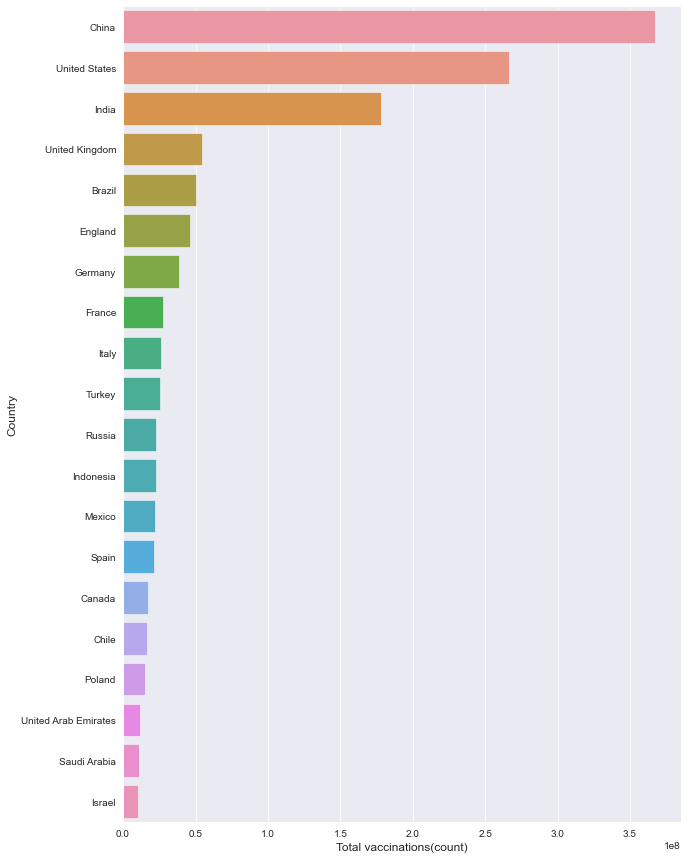

In [77]:
#barplot visualization of top countries with most vaccinations
x= df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("darkgrid")
plt.figure(figsize= (10,15))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

In [78]:
#Top countries with fully  vaccinated peoples
df["Full_vaccinations(count)"]= df.groupby("country").people_fully_vaccinated.tail(1)

df.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States     118987308.0
India              39274256.0
United Kingdom     18890969.0
Brazil             16215378.0
England            15935683.0
Turkey             10669750.0
Mexico              9861173.0
Russia              9129433.0
Indonesia           8919949.0
Germany             8822370.0
France              8632406.0
Italy               8079257.0
Chile               7374467.0
Spain               6716156.0
Israel              5094242.0
Morocco             4441667.0
Poland              4241956.0
Bangladesh          3496186.0
Hungary             2626857.0
Colombia            2612556.0
Name: Full_vaccinations(count), dtype: float64

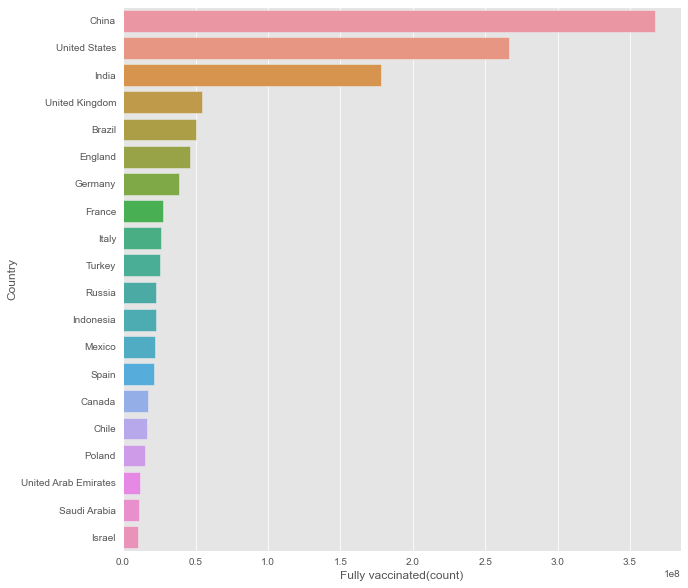

In [79]:
#barplot visualization of top countries with most full vaccinations

plt.style.use("ggplot")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Fully vaccinated(count)")
ax.set_ylabel("Country")
plt.show()

In [80]:
#Vaccine types
x=df.vaccines.unique()
y= list(x)
for i in y: print(i)

Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac
Sinopharm/Beijing
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Covaxin, Oxford/AstraZeneca
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac
Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing
Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Abdala
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Moderna, Oxford/AstraZeneca
Oxford/AstraZeneca, Sinopharm/Beijing
Pfizer/BioNTech, Sinovac
Moderna, Oxford/AstraZeneca, Pfizer/B

In [81]:
#most common vaccines
df.vaccines.value_counts()

Oxford/AstraZeneca                                                                    3146
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2265
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1896
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1412
Pfizer/BioNTech                                                                       1184
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           892
Moderna, Pfizer/BioNTech                                                               799
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      775
Oxford/AstraZeneca, Sinopharm/Beijing                                                  667
Sputnik V                                                                              499
Oxford/AstraZeneca, Sinovac                                                            316

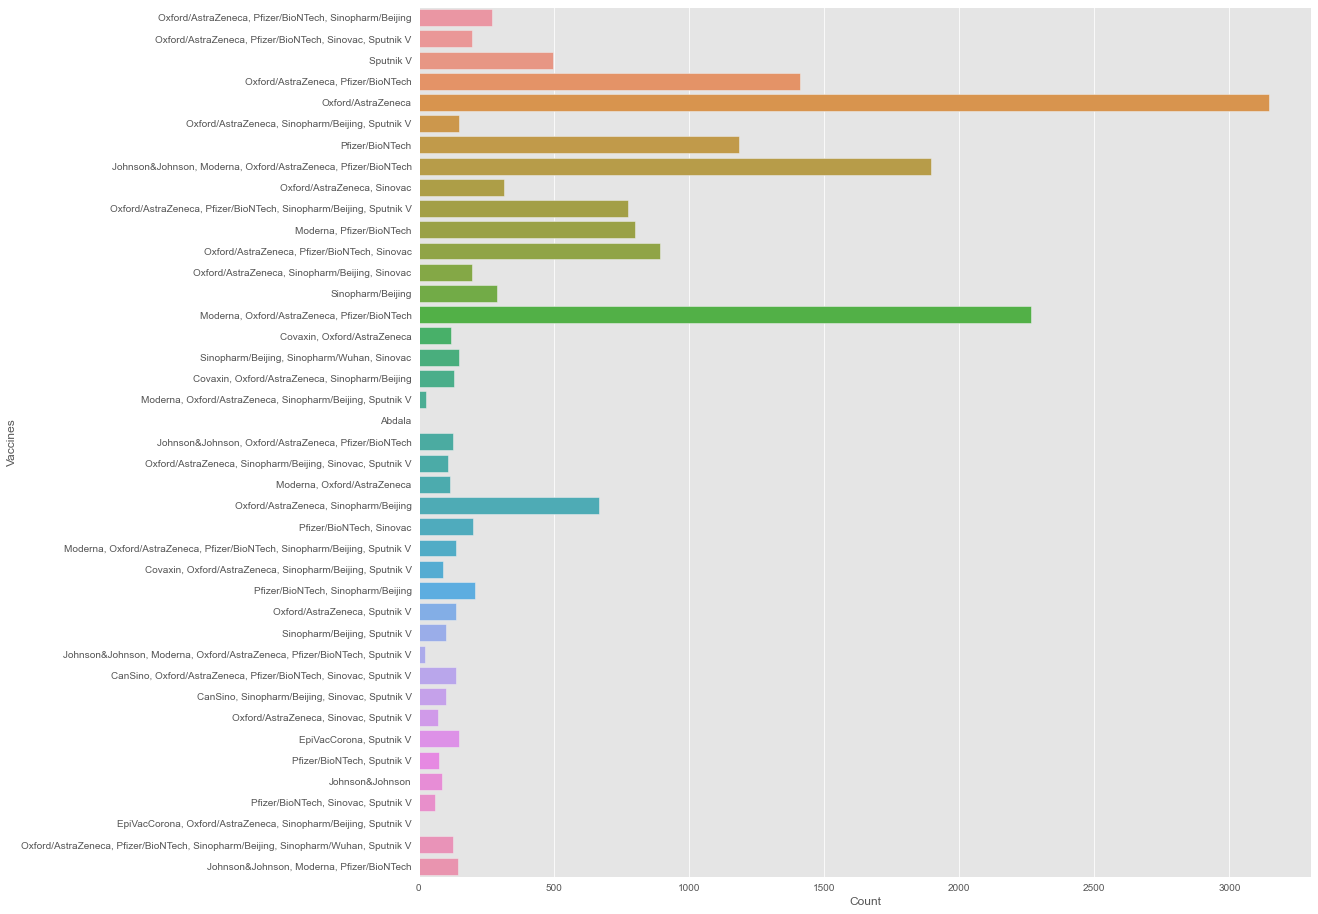

In [82]:
plt.figure(figsize=(16,16))
sns.countplot(y= "vaccines",data= df)
plt.ylabel("Vaccines")
plt.xlabel("Count")
plt.show()

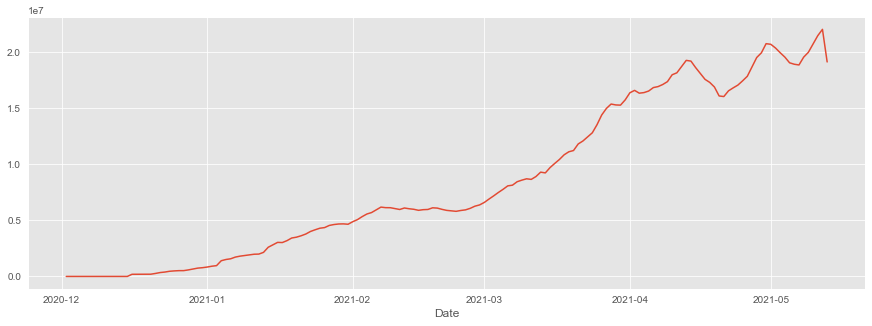

In [83]:
#daily vaccinations
x= df.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)
plt.xlabel("Date")
plt.show()

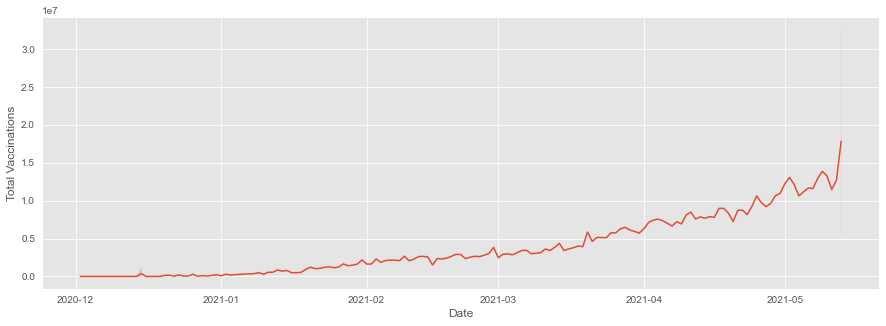

In [84]:
#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

In [85]:
#Countries with best daily average vaccinations
x= df.groupby("country").daily_vaccinations.mean().sort_values(ascending= False).head(20)
x


country
China             2.243911e+06
United States     1.812283e+06
India             1.457232e+06
Brazil            4.106319e+05
United Kingdom    4.067347e+05
England           3.407686e+05
Germany           2.657916e+05
Turkey            2.149443e+05
France            1.905210e+05
Indonesia         1.838991e+05
Italy             1.793593e+05
Spain             1.563120e+05
Mexico            1.532505e+05
Russia            1.471196e+05
Chile             1.139837e+05
Canada            1.085240e+05
Poland            1.041508e+05
Morocco           9.786512e+04
Bangladesh        8.830127e+04
Saudi Arabia      8.435846e+04
Name: daily_vaccinations, dtype: float64

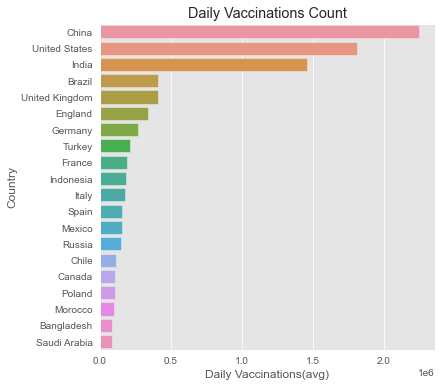

In [86]:
#daily vaccinations barplot
plt.figure(figsize= (6,6))
ax= sns.barplot(x.values,x.index)
ax.set_title("Daily Vaccinations Count")
ax.set_xlabel("Daily Vaccinations(avg)")
ax.set_ylabel("Country")
plt.show()

In [87]:
#vaccination per hundred top countries
df["Total_vaccinations_per_hundred"]= df.groupby("country").total_vaccinations_per_hundred.tail(1)

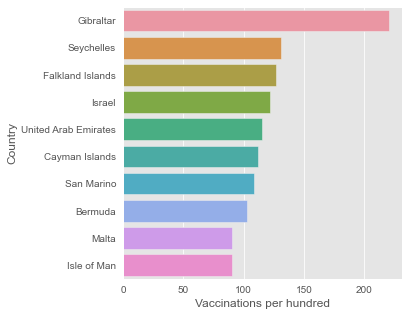

In [88]:
x= df.groupby("country")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.values,x.index)
ax.set_ylabel("Country")
ax.set_xlabel("Vaccinations per hundred")
plt.show()


In [89]:
#daily vaccinations per million top countries
df.groupby("country")["daily_vaccinations_per_million"].mean().sort_values(ascending= False).head(20)

country
Falkland Islands        21459.424242
Bhutan                  20048.770833
Gibraltar               19022.094017
San Marino              14056.635135
Curacao                 12729.866667
Aruba                   12571.866667
Saint Helena            11408.723077
Nauru                   11336.363636
Seychelles              11327.801724
Wallis and Futuna        9572.489796
Jersey                   8684.714286
Mongolia                 8595.087500
Israel                   8425.227586
Bermuda                  8304.278689
United Arab Emirates     8282.734375
Maldives                 8209.479592
Uruguay                  8030.720000
Cayman Islands           7975.442029
Isle of Man              7698.396396
Malta                    7367.191304
Name: daily_vaccinations_per_million, dtype: float64

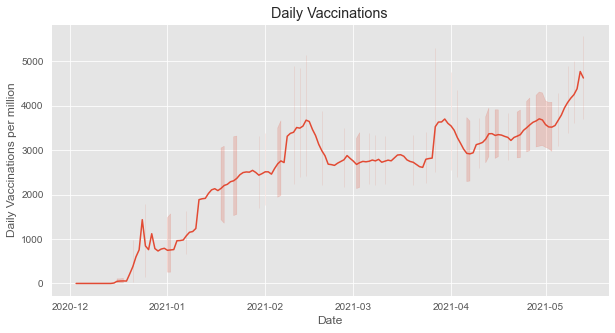

In [104]:
#daily vaccination per million 
plt.figure(figsize= (10,5))
plt.style.use("ggplot")
sns.lineplot(x="date",y="daily_vaccinations_per_million",data= df)
plt.title("Daily Vaccinations")
plt.ylabel("Daily Vaccinations per million")
plt.xlabel("Date")
plt.show()

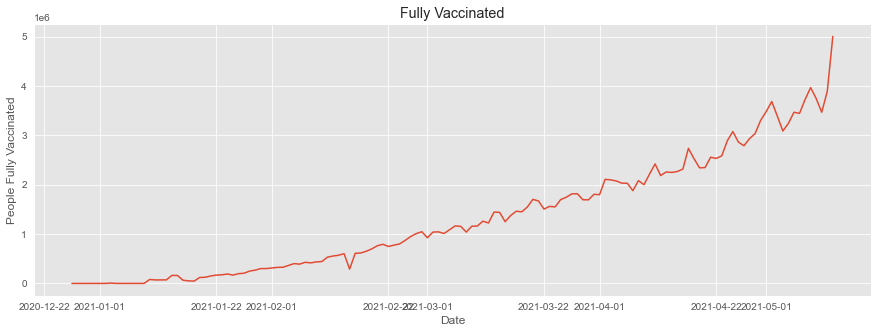

In [91]:
#people fully vaccinated
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated",data= df)
plt.title("Fully Vaccinated")
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated")
plt.show()

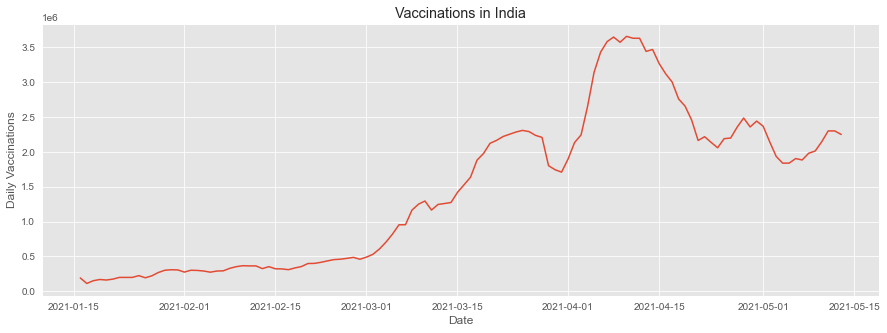

In [92]:
#daily vaccinations in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.title("Vaccinations in India")
sns.lineplot(x= "date",y= "daily_vaccinations",data= df[df.country== "India"])
plt.show()


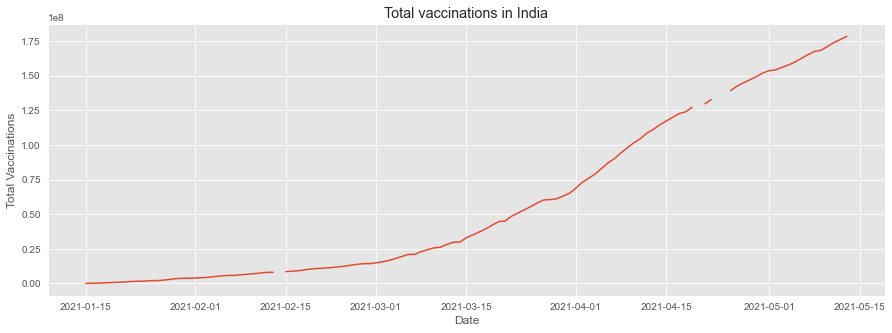

In [93]:
#Total vaccinations in India
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in India")
sns.lineplot(x= "date",y= "total_vaccinations",data= df[df["country"]=="India"])
plt.show()


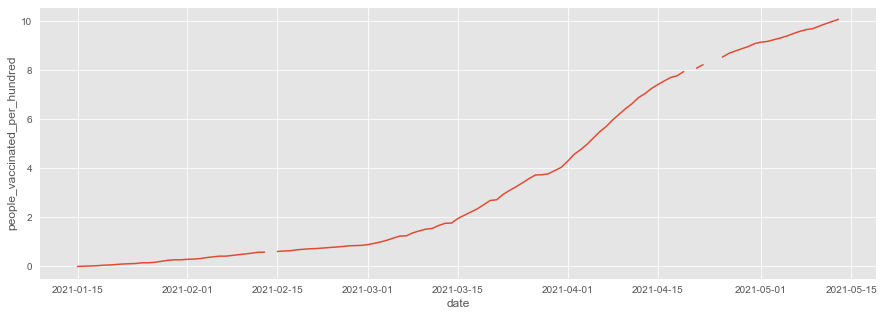

In [94]:
#people_vaccinated per hundred in India
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_vaccinated_per_hundred",data= df[df["country"]=="India"])
plt.show()

In [95]:
#preferred vaccine in India
x= df[df["country"]=="India"]
z= x.vaccines.value_counts()
c= list(z.index)
c

['Covaxin, Oxford/AstraZeneca']

In [96]:
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(10)

country
China             366910000.0
United States     266596486.0
India             178361846.0
United Kingdom     54797640.0
Brazil             50308106.0
England            45908796.0
Germany            38646171.0
France             27455748.0
Italy              25948925.0
Turkey             25402277.0
Name: Total_vaccinations(count), dtype: float64

In [97]:
#creating dataframe for top 5 vaccinated countries
x= df.loc[(df.country== "United States") | (df.country== "China")| (df.country== "India")| (df.country== "Unted Kingdom")|(df.country== "England")]

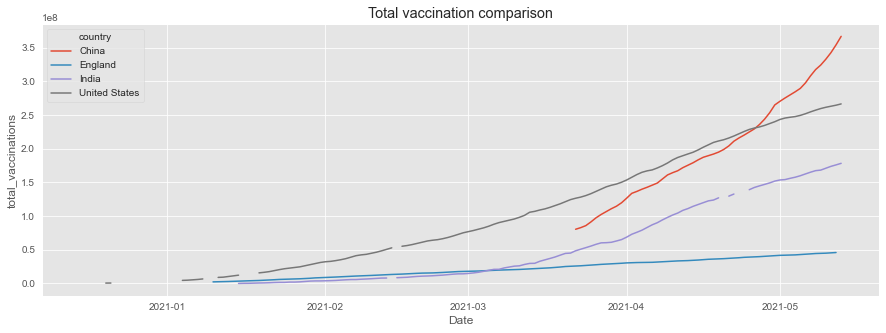

In [98]:
#total vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "country")
plt.xlabel("Date")
plt.title("Total vaccination comparison")
plt.show()


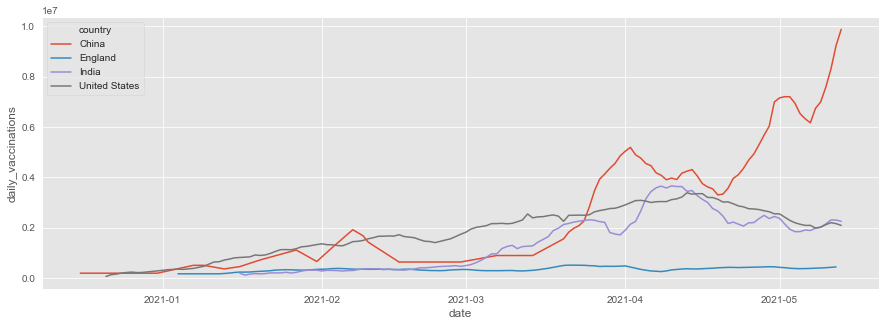

In [99]:
#daily vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations" ,data= x,hue= "country")
plt.show()

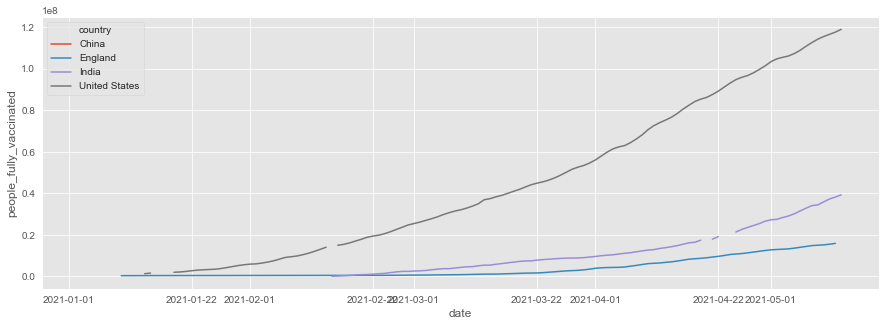

In [100]:
#full vaccinations comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated" ,data= x,hue= "country")
plt.show()

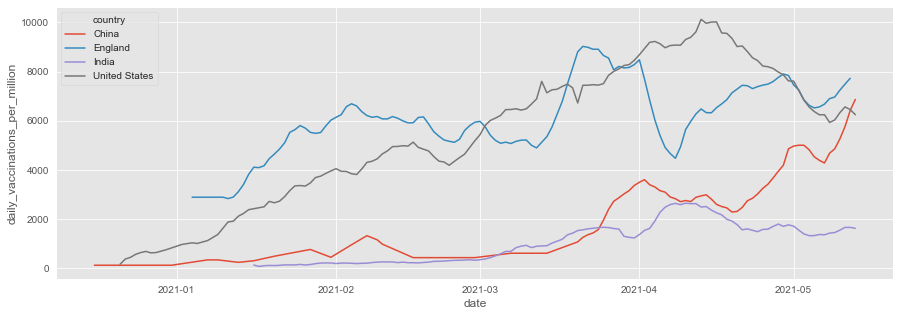

In [101]:
#daily vaccination per million comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations_per_million" ,data= x,hue= "country")
plt.show()